<a href="https://colab.research.google.com/github/AlexianL/StudentProject2023/blob/main/ANN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Normalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler

In [3]:
from logging import RootLogger
# Mount Google Drive
from google.colab import drive # import drive from google colab

root = "/content/drive"     # default location for the drive

drive.mount(root)           # we mount the google drive at /content/drive

# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
my_google_drive_path = "MyDrive/StudentProject2023"

project_path = join(root, my_google_drive_path)

df = pd.read_csv(join(project_path,"merged_data.csv"), sep=",")

Mounted at /content/drive


In [6]:
df["Asym"] = ( (df["N"]-df["Z"])**2 ) / df["A"]


df["Pair"]= np.power(df["A"],-1/2)

,Z,N,dz_BE/A,dz_ME,A,dz_BE,dz_S1n,dz_S1p,dz_S2p,dz_S2n,ame_ME,ame_BE/A,ame_AM,ame_BE,ame_S2p,ame_S2n,BE_diff_dz_ame,Asym,Pair
0,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274,13.694133,6.922055,16.014701,110.752874,42.188312,5.468396,0.382207,1.000000,0.250000
1,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029,-4.737002,7.976207,15.994915,127.619315,16.866442,28.887419,-0.284524,0.000000,0.250000
2,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935,5.683907,7.373797,16.006102,117.980754,29.863098,13.322146,-0.732763,0.250000,0.250000
3,9,8,7.587443,1.185776,17,128.986529,17.576861,1.082690,13.766569,33.561636,1.951701,7.542328,17.002095,128.219583,4.353683,30.757687,-0.766946,0.058824,0.242536
4,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103,43.716322,5.269668,17.046931,89.584351,-21.840433,1.383694,1.529420,2.882353,0.242536
5,8,9,7.812744,-1.862000,17,132.816650,4.912811,14.103134,26.953859,21.044216,-0.808764,7.750729,16.999132,131.762395,20.275949,19.807022,-1.054256,0.058824,0.242536
6,6,11,6.508854,21.868843,17,110.650516,0.279850,23.692936,44.979583,4.787725,21.031880,6.558026,17.022579,111.486445,14.155602,4.983901,0.835929,1.470588,0.242536
7,10,7,6.661270,16.148369,17,113.241584,17.656890,1.831916,1.469149,43.782992,16.500452,6.640499,17.017714,112.888485,-18.873910,39.857557,-0.353100,0.529412,0.242536
8,7,10,7.341997,6.923058,17,124.813943,6.100427,14.443277,37.632115,9.593983,7.870079,7.286229,17.008449,123.865900,34.281549,8.373995,-0.948044,0.529412,0.242536
9,8,10,7.835628,-2.015274,18,141.041305,8.224654,16.227361,30.670638,13.137466,-0.782816,7.767098,17.999160,139.807766,24.137388,12.188451,-1.233539,0.222222,0.235702


In [7]:
target = df["ame_BE"]
n_input = df["N"]
z_input = df["Z"]
asym_input = df["Asym"]
pair_input = df["Pair"]


scaler = MinMaxScaler(feature_range=(0,1))
scaled_n = scaler.fit_transform(pd.Series.to_numpy(n_input).reshape(-1,1))
scaled_z = scaler.fit_transform(pd.Series.to_numpy(z_input).reshape(-1,1))
scaled_asym = scaler.fit_transform(pd.Series.to_numpy(asym_input).reshape(-1,1))
scaled_pair = scaler.fit_transform(pd.Series.to_numpy(pair_input).reshape(-1,1))
scaled_target = scaler.fit_transform(pd.Series.to_numpy(target).reshape(-1,1))

In [13]:
input1 = keras.layers.Input(shape=(1,))
input2 = keras.layers.Input(shape=(1,))
input3 = keras.layers.Input(shape=(1,))
input4 = keras.layers.Input(shape=(1,))
merged = keras.layers.Concatenate()([input1, input2, input3, input4])
dense1 = keras.layers.Dense(64, input_dim=4, activation="relu")(merged)
dense2 = keras.layers.Dense(64, activation="relu")(dense1)
dense3 = keras.layers.Dense(64, activation="relu")(dense2)
dense4 = keras.layers.Dense(64, activation="relu")(dense3)
output = keras.layers.Dense(1, activation="relu")(dense4)
model4 = keras.models.Model(([input1, input2, input3, input4]),output)

In [14]:
model4.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

Epoch 1/150
273/273 - 1s - loss: 0.0655 - 1s/epoch - 4ms/step
Epoch 2/150
273/273 - 1s - loss: 1.8082e-04 - 625ms/epoch - 2ms/step
Epoch 3/150
273/273 - 1s - loss: 3.0512e-05 - 616ms/epoch - 2ms/step
Epoch 4/150
273/273 - 1s - loss: 1.9047e-05 - 643ms/epoch - 2ms/step
Epoch 5/150
273/273 - 1s - loss: 1.4849e-05 - 640ms/epoch - 2ms/step
Epoch 6/150
273/273 - 1s - loss: 1.2815e-05 - 615ms/epoch - 2ms/step
Epoch 7/150
273/273 - 1s - loss: 1.1282e-05 - 636ms/epoch - 2ms/step
Epoch 8/150
273/273 - 1s - loss: 9.9408e-06 - 598ms/epoch - 2ms/step
Epoch 9/150
273/273 - 1s - loss: 9.0597e-06 - 641ms/epoch - 2ms/step
Epoch 10/150
273/273 - 1s - loss: 8.2216e-06 - 647ms/epoch - 2ms/step
Epoch 11/150
273/273 - 1s - loss: 7.4796e-06 - 605ms/epoch - 2ms/step
Epoch 12/150
273/273 - 1s - loss: 6.6870e-06 - 618ms/epoch - 2ms/step
Epoch 13/150
273/273 - 1s - loss: 6.1691e-06 - 811ms/epoch - 3ms/step
Epoch 14/150
273/273 - 1s - loss: 5.7188e-06 - 883ms/epoch - 3ms/step
Epoch 15/150
273/273 - 1s - loss: 4.

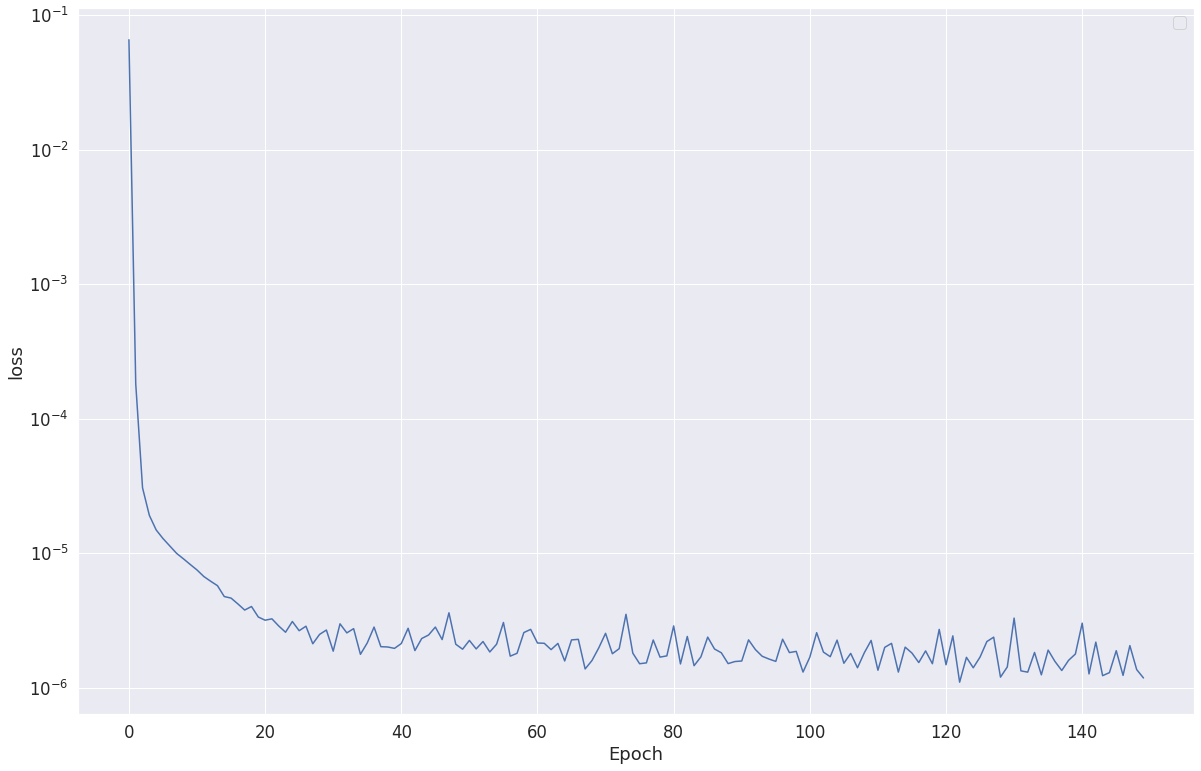

In [15]:
history4=model4.fit(x=([scaled_n,scaled_z, scaled_asym, scaled_pair]), y=scaled_target,batch_size=11, epochs=150, shuffle=True, verbose=2)

plt.figure(figsize =(20,13))
plt.yscale('log')
plt.legend('labels')

plt.plot(history4.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

#Be careful : loss is mean_squared_error, not RMS, and is calculated among 
#Rescaled variable, so it doesn't mean a lot

In [20]:


test_target = df["ame_BE"]
test_n_input = df["N"]
test_z_input = df["Z"]
test_asym_input = df["Asym"]
test_pair_input = df["Pair"]


scaler=MinMaxScaler(feature_range=(0,1))
test_scaled_n=scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z=scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_asym=scaler.fit_transform(pd.Series.to_numpy(test_asym_input).reshape(-1,1))
test_scaled_pair=scaler.fit_transform(pd.Series.to_numpy(test_pair_input).reshape(-1,1))
test_scaled_target=scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))
predictions = model4.predict(x=([test_scaled_n,test_scaled_z,test_scaled_asym, test_scaled_pair]), batch_size=1, verbose=0) ## we use the model 4

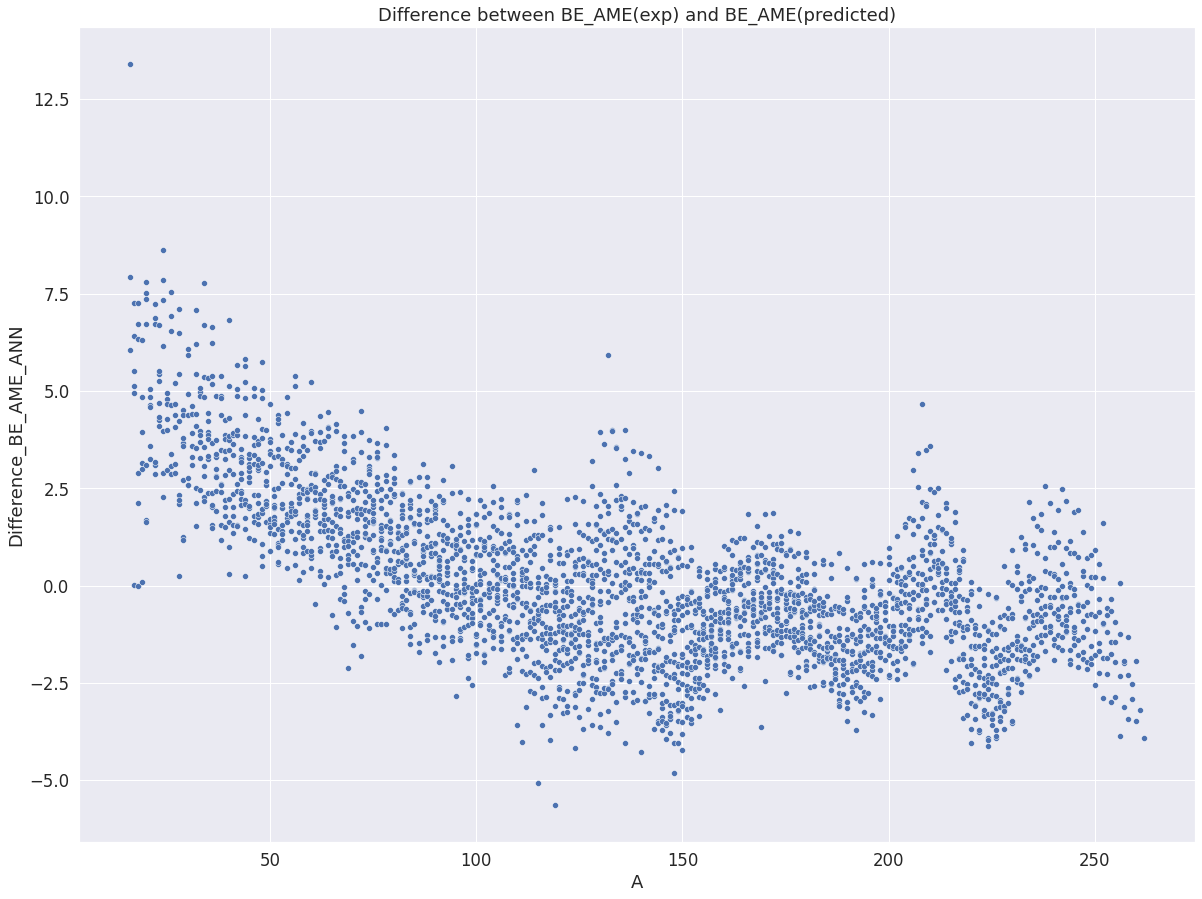

In [24]:
rescaled_predictions=[(i - scaler.min_)/scaler.scale_ for i in predictions]


df["BE_Predictions"]=np.double(rescaled_predictions)
#df["BE/A_Predictions"]=df["BE/A_Predictions"]/1000
df["Difference_BE_AME_ANN"]=df["ame_BE"]-df["BE_Predictions"]



plt.figure(figsize =(20,15))

plt.title('Difference between BE_AME(exp) and BE_AME(predicted)')

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=df, palette="rainbow_r")

In [25]:

test_target = df["BE/A_DZ10"]
test_n_input=df["N"]
test_z_input=df["Z"]

scaler=MinMaxScaler(feature_range=(0,1))
test_scaled_n=scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z=scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_target=scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))
predictions = model4.predict(x=([test_scaled_n,test_scaled_z]), batch_size=1, verbose=0) ## we use the model 4

KeyError: ignored

In [26]:
rescaled_predictions=[(i - scaler.min_)/scaler.scale_ for i in predictions]


df["BE/A_Predictions"]=np.double(rescaled_predictions)
df["Difference_DZ10"]=df["BE/A_DZ10"]-df["BE/A_Predictions"]



plt.figure(figsize =(20,15))

plt.title('Difference between both AME and DZ10 and predictions')
plt.ylabel('Difference models - predictions')

sns.scatterplot(x="A",y="Difference_AME",data=df, label="Difference_AME", palette="rainbow_r")
sns.scatterplot(x="A",y="Difference_DZ10",data=df, label="Difference_DZ10", palette="rainbow_r")
plt.legend()

KeyError: ignored